In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import os

In [2]:
workDir= os.getcwd()
outputDir= workDir+'/outputPlots/'

In [3]:
def neutronAbundance(mp, mn, Xn0, title, 
                     xEqFactorToPlot= 2.,
                     yMin= 10**-5, yMax=10**0,
                     savePlots= False, outDir= None, filenameTag= ''):
    Q= mn-mp   # MeV
    tauN = 886.7  # sec; neturon lifetime
    
    print 'Q= ', Q
    def H1(Q, gstar= 10.75): # based on Dod Eq. 3.28
        DodQ= 1.293
        G=  1.13**2*45./(4*np.pi**3.*gstar*DodQ**4)
        return np.sqrt(4.*np.pi**3*G*Q**4/45.)*np.sqrt(gstar) 

    def lambda_NP(x):
        return (255./(tauN*x**5.))*(12. + 6.*x + x**2.) # Dod Eq. 3.29
        
    #print lambda_NP(1)
    def dXndx(Xn, x, gstar= 10.75):
        factor= x*lambda_NP(x)*(mp/mn)**(3./2.)/H1(Q, gstar= gstar)
        #factor= x*lambdaNP(x)/H1(Q, gstar= gstar)
        dXndx = factor*(np.exp(-x) - Xn*(1. + np.exp(-x)))
        return dXndx
    
    # plot T vs. Xn
    T = np.logspace(0,-3, 200)
    x= Q/T
    result = odeint(dXndx, Xn0, x, args= (10.75,))
    plt.plot(T, result[:,0], 'o', color='b', label= '$X_n$')
    plt.plot(T, result[:,0], color='b')

    #t= 132*(0.1/T)**2
    #plt.plot(T, result[:,0]*np.exp(-t/tauN), 'o', color='r', label= r'$X_n \ e^{-t/{\tau}}$')
    #plt.plot(T, result[:,0]*np.exp(-t/tauN), color='r')
    
    Xeq= 1./(1+np.exp(Q/T))
    #print Xeq
    plt.plot(T, xEqFactorToPlot*Xeq, 'o', color='g', label= '$%.fX_{n,EQ}$'%xEqFactorToPlot)
    plt.plot(T, xEqFactorToPlot*Xeq, color='g')

    plt.gca().invert_xaxis()
    plt.xlim(1.3, 0.0005)
    plt.ylim(yMin, yMax)
    
    plt.title(title, fontsize= 18)
    fontsize, tickLabelFontSize, legendFontSize= 16, 16, 16
    plt.xlabel('T (MeV)', fontsize= fontsize)
    plt.ylabel('Fractional Abundance', fontsize= fontsize)
    plt.xscale('log')
    plt.yscale('log')
    plt.tick_params(axis='x', labelsize=tickLabelFontSize)
    plt.tick_params(axis='y', labelsize=tickLabelFontSize)
    
    plt.legend(loc= "lower right", fontsize= legendFontSize)
    if savePlots:
        os.chdir(outDir)
        plt.savefig('%sneutronAbundancePlot.eps'%(filenameTag),bbox_inches='tight', format= 'eps')
        os.chdir(workDir)
    plt.show()

Q=  1.294


/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: overflow encountered in exp


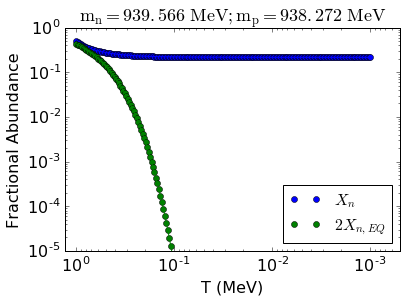

In [4]:
mn0= 939.566 # MeV
mp0= 938.272 #MeV
neutronAbundance(mp0, mn0, [0.5], 0, 
                 title= '$\mathrm{m_n= %s\ MeV; m_p= %s \ MeV}$'%(mn0,mp0),
                savePlots= True, outDir= outputDir, filenameTag= 'Case1')

Q=  -1.294


/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


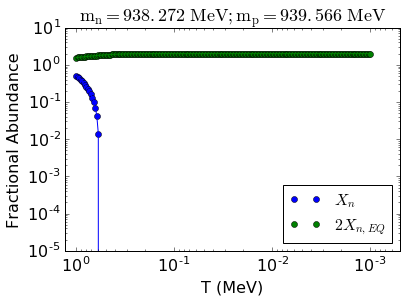

In [5]:
mn= mp0
mp= mn0
neutronAbundance(mp, mn, [0.5], 0, 
                 title= '$\mathrm{m_n= %s\ MeV; m_p= %s \ MeV}$'%(mn,mp),
                 xEqFactorToPlot= 2.,
                 yMin= 10**-5, yMax=10**1,
                 savePlots= True, outDir= outputDir, filenameTag= 'Case2')

Q=  940.86


/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: overflow encountered in exp


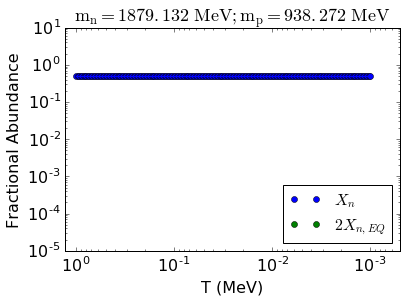

In [6]:
mn=2.*mn0
mp= mp0
neutronAbundance(mp, mn, [0.5], 0, 
                 title= '$\mathrm{m_n= %s\ MeV; m_p= %s \ MeV}$'%(mn,mp),
                xEqFactorToPlot= 2.,
                     yMin= 10**-5, yMax=10**1,
                 savePlots= True, outDir= outputDir, filenameTag= 'Case3')